<a href="https://colab.research.google.com/github/jadenfang/Logistic-Regression-Heart-Disease/blob/main/Log_Reg_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final parameters (w):
[-0.07849212  0.14976823  0.13783055 -0.05653788 -0.05526819  0.05239529
  0.0764754   0.18401414 -0.07931386 -0.05309289 -0.06014622 -0.01525809
 -0.05723568 -0.00579969  0.14084824 -0.00492945  0.02122207  0.07940915
  0.11523079  0.12514751 -0.26693088 -0.16662776]


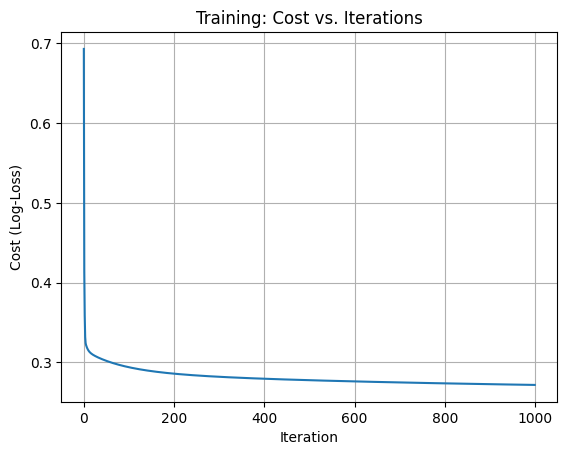

Plotting cost sensitivity for parameter indices: [20  7 21]


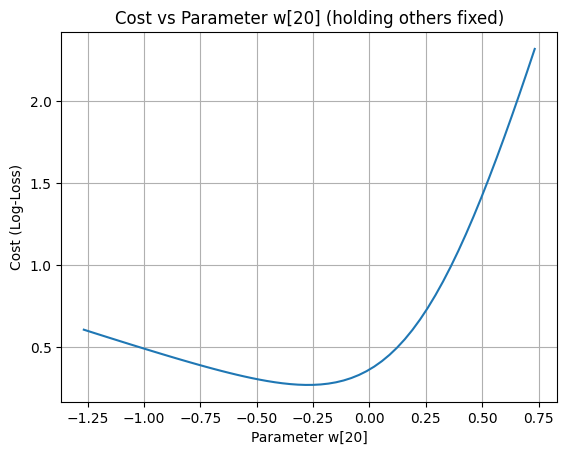

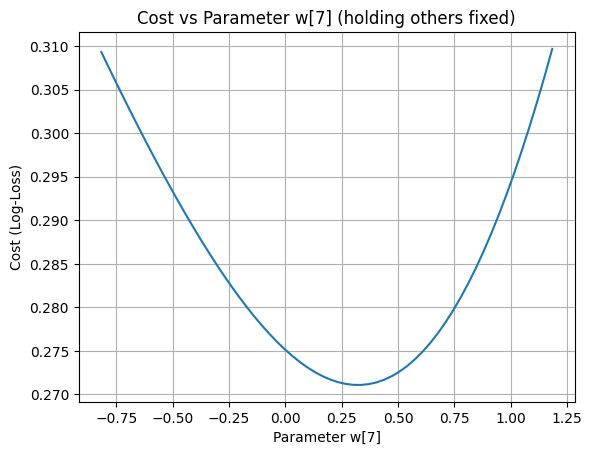

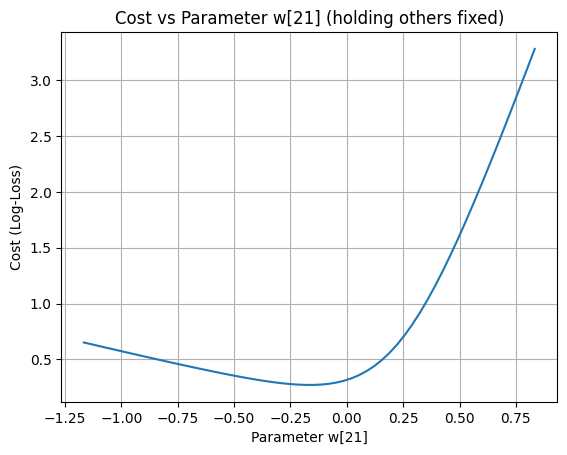

Training accuracy (for reference only): 0.9041982024597919


In [4]:
# ================================
# Logistic Regression (from scratch)
# ================================

# 0) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load / prepare data
# --------------------------------------------------
# Assumptions (edit as needed):
#   - Binary classification with labels in {0,1}
#   - X is an (m, n) feature matrix (no bias column yet)
#   - y is an (m,) label vector

# TODO: replace with your real data loading
def load_data():
    # EXAMPLE PLACEHOLDER — REPLACE with file read:
    df = pd.read_csv("datatset.csv")
    return df

    # (Optional) Feature scaling — often helps training stability

    # (Optional) Split the dataset into training and test

df = load_data()
X = df.drop(columns=["HeartDiseaseorAttack"]).values.astype(float)
y = df["HeartDiseaseorAttack"].values.astype(float)

m, n = X.shape

# Add bias column (x0 = 1)
X = np.column_stack([np.ones(m), X])  # shape: (m, n+1)
n_with_bias = X.shape[1]

# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
def sigmoid(z):
    # σ(z) = 1 / (1 + e^-z)
    # TODO: Complete the sigmoid function
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w):
    # p = σ(Xw)
    # TODO: Complete the predict probability function
    return sigmoid(X @ w)

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    # Log-loss = - [ y log(p) + (1-y) log(1-p) ]
    # You might need to restrict the values using np.clip
    # TODO: Complete the binary cross entropy function
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

def gradient(X, y_true, y_prob):
    # ∂J/∂w = (1/m) X^T (p - y)
    # TODO: Complete the gradient descent function
    return (X.T @ (y_prob - y_true)) / (len(y_true))

# 3) Initialize parameters
# --------------------------------------------------
# TODO: set the initial values for the parameters
w = np.zeros(n_with_bias)

# 4) Hyperparameters
# --------------------------------------------------
# TODO: set learning_rate and num_iterations
learning_rate = 0.01
num_iterations = 1000

# For tracking
cost_history = []

# 5) Gradient Descent loop
# --------------------------------------------------

    # TODO: Forward pass: compute probabilities

    # TODO: Compute loss (log-loss / cross-entropy)

    # TODO: Backward pass: compute gradient

    # TODO Parameter update

for i in range(num_iterations):

    y_ = predict_proba(X, w)

    cost = binary_cross_entropy(y, y_)
    cost_history.append(cost)

    grad = gradient(X, y, y_)

    w -= learning_rate * grad

# 6) Final parameters
# --------------------------------------------------
print("Final parameters (w):")
print(w)  # w[0] is bias term

# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()

# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
# Idea: pick 3 parameters (excluding bias) by magnitude after training,
# then sweep each parameter around its learned value while holding others fixed,
# and plot the (1D) cost curve for each.
#At the end of training, you have a weight vector w (parameters). You also have a
# cost function 𝐽 ( 𝑤)
#J(w), which tells you how good or bad those weights are.

#Normally, we look at cost vs iterations (how the loss decreases over time). But sometimes it’s useful to see:
# “What happens to the cost if I wiggle just one parameter, while keeping all others fixed?”

# That’s what the sweep does.
#For each candidate value in the sweep, we create a temporary weight vector w_tmp.
# We replace the chosen parameter with val.
# Then we compute the cost 𝐽 (𝑤_tmp ) using the same dataset.
# Append that cost to a list.

#We plot:

#x-axis: the parameter’s value (from the sweep)

#y-axis: the cost computed at that parameter value

#This shows the “sensitivity curve” of the cost with respect to that parameter.

# Identify top-3 parameters by |w| (excluding bias at index 0)

param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # shift by 1 to skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    # Helper to compute cost for a modified parameter vector
    y_hat_mod = predict_proba(X, mod_w)
    return binary_cross_entropy(y, y_hat_mod)

# For each chosen parameter, sweep values and compute cost
for idx in param_indices:
    center = w[idx]
    #  choose a sensible sweep range; here: ±1.0 around the trained value
    sweep = np.linspace(center - 1.0, center + 1.0, 60)
    costs = []

    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()

# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    # Returns 0/1 predictions based on threshold
    return (predict_proba(X_new, w) >= threshold).astype(int)

# Example usage (remove in production):
preds = predict_label(X, w)
accuracy = (preds == y).mean()
print("Training accuracy (for reference only):", accuracy)